KEY REQUIREMENTS ON PROMPT:
1. Clean and organize the data into a usable format. 
2. Investigate trends, including: Which users are most likely to purchase virtual merchandise? How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 
3. Apply clustering, predictive modeling, or any other relevant techniques to identify key insights about user behavior. 

ANSWERS:
1. The data seems fairly organized already as there isn't any missing data. The information has been loaded into a pandas data frame for easy managment on a jupyter notebook. There also doesn't really seem to be any outliers 
2. There doesn't seem to really any substantial correlation for users that purchase virtual merchandise. Looking at the data it seemed fairly spread out even when doing a seaborn regression plot. There is a weak correlation of 0.16 between a fan's completed challenges and the virtual merchandise purchased, which could suggest that the more avid fans who complete challenges are also willing to purchase virtual merchandise which makes sense. 



INSIGHTS:
1. This data seems really random in its comparisons for the columns. There doesn't seem to much correlation between each individual column of data. 
2. The data in each column also seems to have a fairly balanced spread when looking at the box plot versions of the data. 


In [102]:
#Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


In [103]:
#read data 
#I also hand classified a dictionary so that it would be easier referring to different colors. 
totaldata = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
#totaldata.head()
column_titles = totaldata.columns.tolist()

#column_titles = ['User ID', 'Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

colorcode = {
    'User ID': 'orange',
    'Fan Challenges Completed': 'blue',
    'Predictive Accuracy (%)': 'red',
    'Virtual Merchandise Purchases': 'green',
    'Sponsorship Interactions (Ad Clicks)': 'pink',
    'Time on Live 360 (mins)': 'purple',
    'Real-Time Chat Activity (Messages Sent)': 'cyan'

}


numeric_columns = [
    'Fan Challenges Completed',
    'Predictive Accuracy (%)',
    'Virtual Merchandise Purchases',
    'Sponsorship Interactions (Ad Clicks)',
    'Time on Live 360 (mins)',
    'Real-Time Chat Activity (Messages Sent)'
]


In [ ]:
#Finds the data for the above average fan. 
#There is only 1 fan that is above average for all the categories so it seems like fan participation is fairly random
average_metrics = totaldata[numeric_columns].mean()
above_average_fans = totaldata[
    (totaldata[numeric_columns] > average_metrics).all(axis=1)
]
plt.figure(figsize=(12, 6))
sns.barplot(data=above_average_fans[numeric_columns].mean().reset_index(), x='index', y=0)
plt.title('Average Metrics for Fans Above Average')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()
print(len(above_average_fans))

In [ ]:
#Basic Statistical Analysis data values
df_copy = totaldata.drop(columns=['User ID'])  # Drop the User ID column
print(df_copy.describe())  

# Calculate the correlation matrix
correlation_matrix = df_copy.corr()  

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#cross comparing each category to another to see if ther is anything that stands out
#nothing really stands out 
for i in range(6):
    for j in range(i+1, 7):
        plt.scatter(x = column_titles[i], y = column_titles[j], data = totaldata)
        plt.xlabel(column_titles[i])  # Set x-axis label
        plt.ylabel(column_titles[j])
        plt.show()


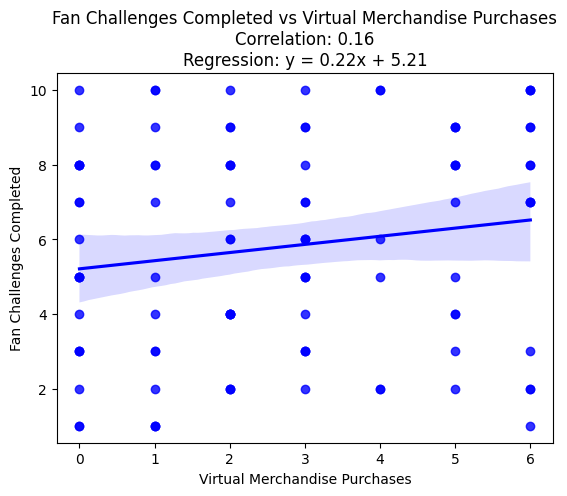

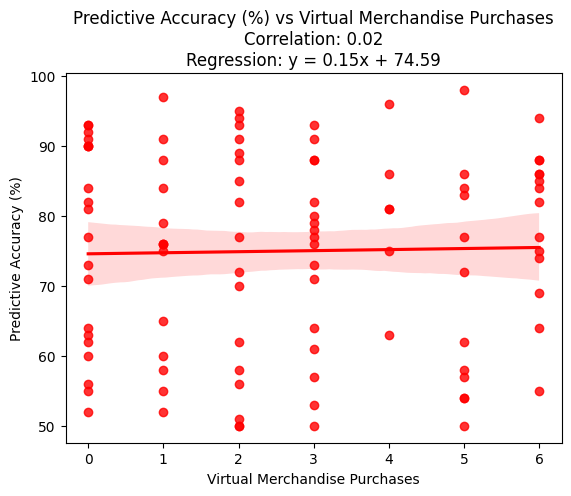

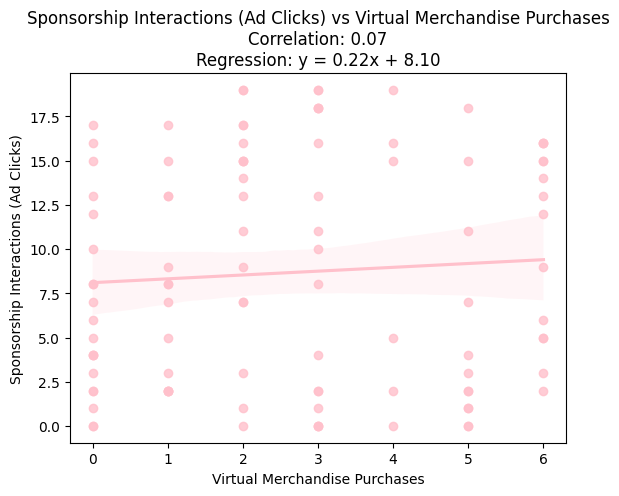

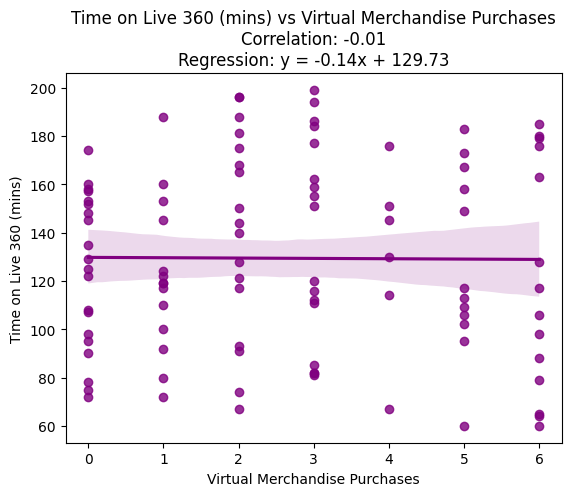

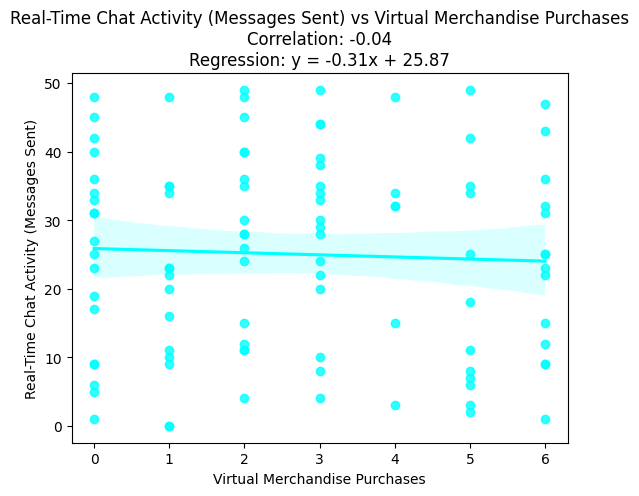

In [107]:
#Virtual Meerchandise Correlation

for j in range(6):
    if numeric_columns[j] != 'Virtual Merchandise Purchases':
        sns.regplot(x = 'Virtual Merchandise Purchases', y = numeric_columns[j], data = totaldata, color = colorcode[numeric_columns[j]])
        plt.xlabel('Virtual Merchandise Purchases')  # Set x-axis label
        plt.ylabel(numeric_columns[j])


        correlation, i = stats.pearsonr(totaldata['Virtual Merchandise Purchases'], totaldata[numeric_columns[j]])
        #R score essentiall
        # Fit the regression model
        model = LinearRegression()
        X = totaldata[['Virtual Merchandise Purchases']]
        Y = totaldata[numeric_columns[j]]
        model.fit(X, Y)
        slope = model.coef_[0]
        intercept = model.intercept_
        
        # Create the regression equation string
        regression_eq = f'y = {slope:.2f}x + {intercept:.2f}'
        
        # Display the correlation and regression equation on the plot
        plt.title(f'{numeric_columns[j]} vs Virtual Merchandise Purchases\n'
                  f'Correlation: {correlation:.2f}\n'
                  f'Regression: {regression_eq}')
        
        plt.show()

In [108]:
#Eliminate outliers. I don't think there are much but might as well see
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.4)
    Q3 = df[column].quantile(0.6)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Clean the data for outliers
for column in numeric_columns:
    nooutdata = remove_outliers_iqr(totaldata, column)

# Display the cleansed DataFrame shape and a few rows
print(type(nooutdata))

print(f"Cleansed DataFrame shape: {nooutdata.shape}")
#print(nooutdata.head())


<class 'pandas.core.frame.DataFrame'>
Cleansed DataFrame shape: (66, 7)


In [ ]:
for column in numeric_columns:
    sns.boxplot(x=totaldata[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

One interesting point that I saw the instructions make was the idea that the 6 non ID columns were segmented into 3 cateogries that measure a fan's immersiveness, engagement, and monetization. I decided to create a new data frame where each column is the sum of the fan's rank in the 2 columns that lead to that category. This would hopefully normalize the data values as some of the numbers in a column are much larger than the others. 

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


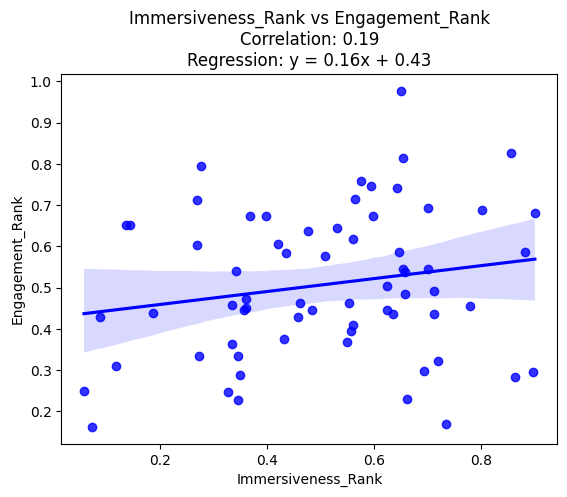

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


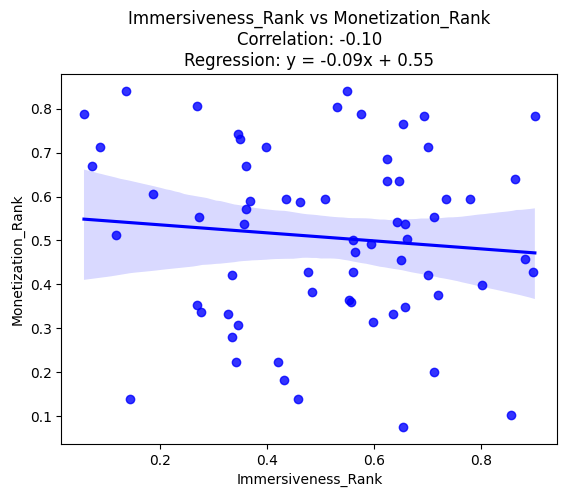

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/742570179.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


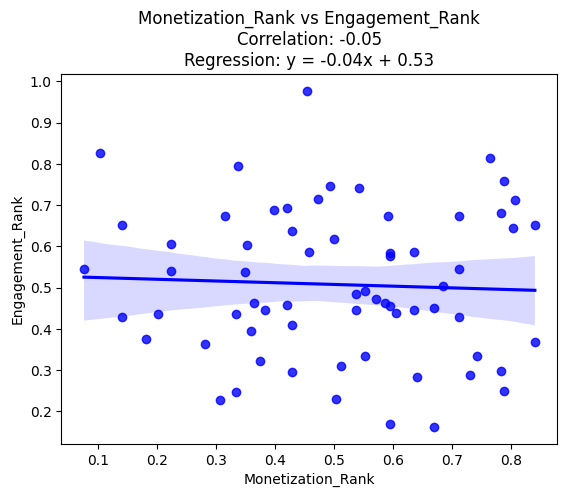

In [110]:
# Calculate percentile ranks for each column

#sumcopy = totaldata.copy()

sumcopy = nooutdata.copy()
sumcopy['Immersiveness_Rank'] = (sumcopy['Real-Time Chat Activity (Messages Sent)'].rank(pct=True) + 
                            sumcopy['Time on Live 360 (mins)'].rank(pct=True)) / 2

sumcopy['Engagement_Rank'] = (sumcopy['Fan Challenges Completed'].rank(pct=True) + 
                         sumcopy['Predictive Accuracy (%)'].rank(pct=True)) / 2

sumcopy['Monetization_Rank'] = (sumcopy['Virtual Merchandise Purchases'].rank(pct=True) + 
                         sumcopy['Sponsorship Interactions (Ad Clicks)'].rank(pct=True)) / 2

# Create the new DataFrame with the desired columns
slicedsumcopy = sumcopy[['User ID', 'Immersiveness_Rank', 'Engagement_Rank', 'Monetization_Rank']]

# Print the new DataFrame
for i in range(3):
    if i  == 0:
        xname = 'Immersiveness_Rank'
        yname = 'Engagement_Rank'
    elif i == 1:
        xname = 'Immersiveness_Rank' 
        yname = 'Monetization_Rank'
    elif i == 2:
        xname = 'Monetization_Rank' 
        yname = 'Engagement_Rank'
    sns.regplot(x = xname, y = yname, data = slicedsumcopy, color = "blue")
    plt.xlabel(xname)  # Set x-axis label
    plt.ylabel(yname)

    correlation, i = stats.pearsonr(slicedsumcopy[xname], slicedsumcopy[yname])
    #R score essentiall
    # Fit the regression model
    
    model = LinearRegression()
    X = slicedsumcopy[[xname]]
    Y = slicedsumcopy[[yname]]
    model.fit(X, Y)
    slope = float(model.coef_[0])
    intercept = float(model.intercept_)
    
    # Create the regression equation string
    regression_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Display the correlation and regression equation on the plot
    plt.title(f'{xname} vs {yname}\n'
                f'Correlation: {correlation:.2f}\n'
                f'Regression: {regression_eq}')
    
    plt.show()
    

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


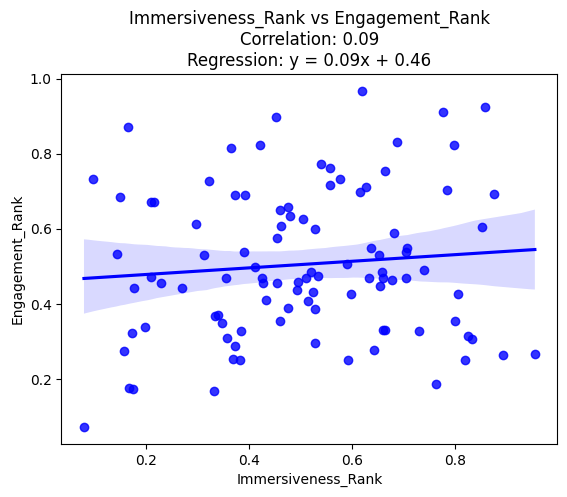

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


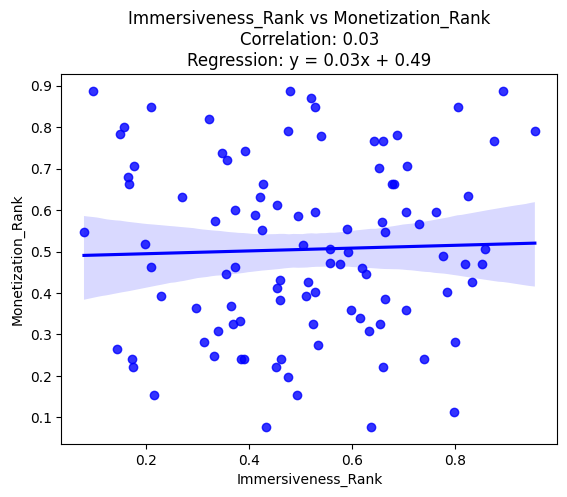

/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/6m/dqjf_b1j3pq023fzcpz1bqnc0000gn/T/ipykernel_6906/721020792.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


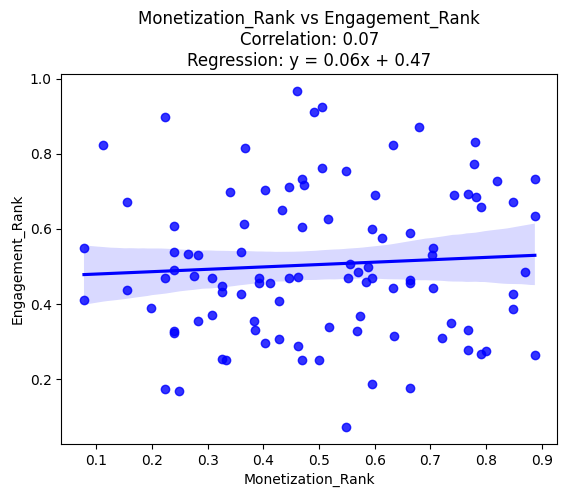

In [111]:
# Calculate percentile ranks for each column

sumcopy = totaldata.copy()

#sumcopy = nooutdata.copy()
sumcopy['Immersiveness_Rank'] = (sumcopy['Real-Time Chat Activity (Messages Sent)'].rank(pct=True) + 
                            sumcopy['Time on Live 360 (mins)'].rank(pct=True)) / 2

sumcopy['Engagement_Rank'] = (sumcopy['Fan Challenges Completed'].rank(pct=True) + 
                         sumcopy['Predictive Accuracy (%)'].rank(pct=True)) / 2

sumcopy['Monetization_Rank'] = (sumcopy['Virtual Merchandise Purchases'].rank(pct=True) + 
                         sumcopy['Sponsorship Interactions (Ad Clicks)'].rank(pct=True)) / 2

# Create the new DataFrame with the desired columns
slicedsumcopy = sumcopy[['User ID', 'Immersiveness_Rank', 'Engagement_Rank', 'Monetization_Rank']]

# Print the new DataFrame
for i in range(3):
    if i  == 0:
        xname = 'Immersiveness_Rank'
        yname = 'Engagement_Rank'
    elif i == 1:
        xname = 'Immersiveness_Rank' 
        yname = 'Monetization_Rank'
    elif i == 2:
        xname = 'Monetization_Rank' 
        yname = 'Engagement_Rank'
    sns.regplot(x = xname, y = yname, data = slicedsumcopy, color = "blue")
    plt.xlabel(xname)  # Set x-axis label
    plt.ylabel(yname)

    correlation, i = stats.pearsonr(slicedsumcopy[xname], slicedsumcopy[yname])
    #R score essentiall
    # Fit the regression model
    
    model = LinearRegression()
    X = slicedsumcopy[[xname]]
    Y = slicedsumcopy[[yname]]
    model.fit(X, Y)
    slope = float(model.coef_[0])
    intercept = float(model.intercept_)
    
    # Create the regression equation string
    regression_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Display the correlation and regression equation on the plot
    plt.title(f'{xname} vs {yname}\n'
                f'Correlation: {correlation:.2f}\n'
                f'Regression: {regression_eq}')
    
    plt.show()
    

In [112]:
#Clustering

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy) #standard
kmeans = KMeans(n_clusters=3)  # Choose an appropriate number of clusters
df_copy['Cluster'] = kmeans.fit_predict(scaled_features)
print(df_copy['Cluster'])

0     1
1     2
2     1
3     0
4     2
     ..
95    0
96    1
97    1
98    1
99    0
Name: Cluster, Length: 100, dtype: int32
